table of contents  
1. Prepare  
2. Dataset Reading, and Preprocess  
3. Calc Pitch Control Impact, and visualize

# Prepare

## Import Library

In [1]:
import os, sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Define Static Parameter

In [2]:
base_dir = os.path.join('..')
fig_dir = os.path.join(base_dir, 'reports', 'figure')

sys.path.append(os.path.join(base_dir, 'scripts'))
import Metrica_PitchControl as mpc
from PlayerPitchControlAnalysis import PlayerPitchControlAnalysisPlayer

In [3]:
cmap_dict = {'yellow':'autumn', 'lightgray':'binary', 'white':'binary', 'darkred':'Reds', 'purple':'Purples', 'cyan':'Blues', 'blue':'Blues', 'red':'Reds', 'black':'binary'}

# Dataset Reading, and Preprocess

In [4]:
data_dir = os.path.join(base_dir, 'datasets', 'preprocessed')
play_list = os.listdir(data_dir)
print(play_list)

['Fulham 0 - [1] Liverpool', 'Genk 0 - [3] Liverpool', 'Bayern 0 - [1] Liverpool', 'Southampton 1 - [2] Liverpool', 'Bournemouth 0 - 3 Liverpool', 'Liverpool [1] - 0 Everton', 'Liverpool [3] - 0 Bournemouth', 'Liverpool [1] - 0 Wolves', 'Liverpool [2] - 1 Chelsea', 'Liverpool [3] - 0 Norwich', 'Liverpool [2] - 0 Porto', 'Liverpool [2] - 0 Everton', 'Liverpool [2] - 1 Newcastle', 'Liverpool [2] - 0 Salzburg', 'Liverpool [2] - 0 Man City', 'Liverpool [1] - 0 Watford', 'Leicester 0 - [3] Liverpool', 'Liverpool [4] - 0 Barcelona', 'Porto 0 - [2] Liverpool']


In [5]:
play = 'Liverpool [2] - 1 Chelsea'
data_dir_tmp = os.path.join(data_dir, play)
df_dict = {infile.split('.')[0]:pd.read_csv(os.path.join(data_dir_tmp, infile), index_col=[0]) for infile in os.listdir(data_dir_tmp)}

## preprocess, get ball df

In [6]:
ball_c_list = [f'ball_{c}' for c in ['x', 'y']]
for k, df in df_dict.items():
    ball_df = df[ball_c_list]
    team = k.split('_')[0]
    
    # remove ball columns
    # df.drop(columns=ball_c_list, inplace=True)

    # get player idx
    mst_df = df[['Time [s]', 'stretch_index']+ball_c_list]
    pid_array = np.unique([c.split('_')[0] for c in df.columns if not c in ['Time [s]', 'stretch_index']+ball_c_list])
    
    # filter columns
    c_list = np.array([[f'{pid}_x', f'{pid}_y', f'{pid}_vx', f'{pid}_vy'] if pid!='ball' else pelse for pid in pid_array]).flatten().flatten().tolist()
    df = df[c_list]

    # rename columns
    df.columns = [f'{team}_{c}' for c in df.columns]
    
    # merge
    df = pd.merge(df, mst_df, on=['frame'])

    df_dict[k] = df

In [7]:
for k, df in df_dict.items():
    print(k)
    print(np.unique([c.split('_')[1] for c in df.columns if c.startswith(k.split('_')[0])]).tolist())
    display(df.head())

Chelsea_blue
['11069', '14238', '24075', '24076', '3342', '3343', '3344', '3346', '3347', '9949']


,Chelsea_11069_x,Chelsea_11069_y,Chelsea_11069_vx,Chelsea_11069_vy,Chelsea_14238_x,Chelsea_14238_y,Chelsea_14238_vx,Chelsea_14238_vy,Chelsea_24075_x,Chelsea_24075_y,...,Chelsea_3347_vx,Chelsea_3347_vy,Chelsea_9949_x,Chelsea_9949_y,Chelsea_9949_vx,Chelsea_9949_vy,Time [s],stretch_index,ball_x,ball_y
frame,,,,,,,,,,,,,,,,,,,,,
0,10.946825,-3.497184,NaN,NaN,51.434932,2.072757,NaN,NaN,3.677551,-11.857143,...,NaN,NaN,10.290292,24.187534,NaN,NaN,0.00,20.238088,7.434636,32.458994
1,10.980321,-3.462608,NaN,NaN,51.434969,2.072870,NaN,NaN,3.694928,-11.874356,...,NaN,NaN,10.331091,24.260899,NaN,NaN,0.05,20.226259,7.559493,32.429260
2,11.007433,-3.429016,NaN,NaN,51.434998,2.072960,NaN,NaN,3.710945,-11.890222,...,NaN,NaN,10.358088,24.326359,NaN,NaN,0.10,20.211805,7.668399,32.391610
3,11.028628,-3.396337,NaN,NaN,51.435021,2.073029,NaN,NaN,3.725656,-11.904794,...,NaN,NaN,10.372278,24.384216,NaN,NaN,0.15,20.194849,7.762309,32.346479
4,11.044373,-3.364498,0.333591,0.639659,51.435037,2.073078,0.000344,0.001053,3.739111,-11.918123,...,1.204912,1.834486,10.374654,24.434775,0.087282,1.023331,0.20,20.175524,7.842176,32.294301


Liverpool_red
['11698', '12', '1214', '1622', '22034', '22035', '22036', '22374', '24074', '24938']


,Liverpool_11698_x,Liverpool_11698_y,Liverpool_11698_vx,Liverpool_11698_vy,Liverpool_12_x,Liverpool_12_y,Liverpool_12_vx,Liverpool_12_vy,Liverpool_1214_x,Liverpool_1214_y,...,Liverpool_24074_vx,Liverpool_24074_vy,Liverpool_24938_x,Liverpool_24938_y,Liverpool_24938_vx,Liverpool_24938_vy,Time [s],stretch_index,ball_x,ball_y
frame,,,,,,,,,,,,,,,,,,,,,
0,5.380653,31.652456,NaN,NaN,14.100680,26.390498,NaN,NaN,21.318011,14.896547,...,NaN,NaN,10.410681,-4.955167,NaN,NaN,0.00,16.486095,7.434636,32.458994
1,5.590719,31.657852,NaN,NaN,14.051092,26.501986,NaN,NaN,21.360648,14.996479,...,NaN,NaN,10.382101,-5.012684,NaN,NaN,0.05,16.499442,7.559493,32.429260
2,5.787612,31.658937,NaN,NaN,13.997512,26.613551,NaN,NaN,21.391852,15.089035,...,NaN,NaN,10.358609,-5.060404,NaN,NaN,0.10,16.511866,7.668399,32.391610
3,5.971762,31.655926,NaN,NaN,13.940436,26.725034,NaN,NaN,21.412239,15.174538,...,NaN,NaN,10.339932,-5.098783,NaN,NaN,0.15,16.523369,7.762309,32.346479
4,6.143599,31.649035,3.453973,-0.12916,13.880365,26.836272,-1.181462,2.218314,21.422426,15.253309,...,0.0,-3.470988e-29,10.325796,-5.128276,-0.293677,-0.608105,0.20,16.533960,7.842176,32.294301


In [8]:
ball_df.head()

,ball_x,ball_y
frame,,
0,7.434636,32.458994
1,7.559493,32.429260
2,7.668399,32.391610
3,7.762309,32.346479
4,7.842176,32.294301


# Calc Pitch Control Impact, and visualize

In [9]:
params = mpc.default_model_params(3)

## set start, end

In [10]:
fps = 20
st_time, ed_time = 4.15, 7.
st_frame, ed_frame = int(st_time*fps), int(ed_time*fps)
print(st_frame, ed_frame)

83 140


In [11]:
events_df = pd.DataFrame(data={'Team':'Liverpool',
                                'Start Frame':[st_frame], 
                                'End Frame':[ed_frame], 
                                'Start X': ball_df.at[st_frame, 'ball_x'], 
                                'Start Y':ball_df.at[st_frame, 'ball_y'],
                                'End X': ball_df.at[ed_frame, 'ball_x'], 
                                'End Y':ball_df.at[ed_frame, 'ball_y']})

## region Away Player 19 analysis

In [12]:
team_list = [k.split('_')[0] for k in df_dict.keys()]

In [13]:
for k, df in df_dict.items():
    if k.startswith('Liverpool'):
        tracking_home = df
    else:
        tracking_away = df

example_player_analysis_away = PlayerPitchControlAnalysisPlayer(
    tracking_home=tracking_home,
    tracking_away=tracking_away,
    params=params,
    events=events_df,
    event_id=0,
    team_player_to_analyze='Liverpool',
    team_list=team_list,
    player_to_analyze=1214,
    field_dimens=(106.0, 68.0),
    n_grid_cells_x=50,
)

In [14]:
# First, let's look at the amount of space the player created with his/her off ball run
print(
    example_player_analysis_away.team_player_to_analyze
    + " Player "
    + str(example_player_analysis_away.player_to_analyze)
    + " created "
    + str(
        int(
            example_player_analysis_away.calculate_space_created(
                replace_function="movement", replace_x_velocity=0, replace_y_velocity=0
            )
        )
    )
    + " m^2 of space with his movement during event "
    + str(example_player_analysis_away.event_id)
)

Liverpool Player 1214 created 155 m^2 of space with his movement during event 0


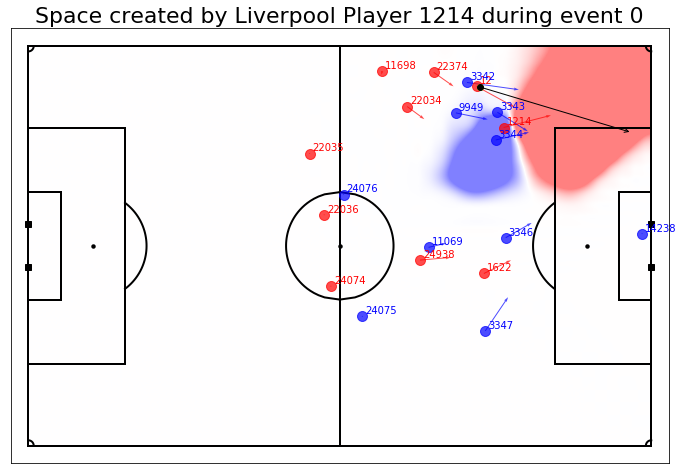

In [15]:
# Now, let's plot the space created and conceded by his run
example_player_analysis_away.plot_pitch_control_difference(
    replace_function="movement", replace_x_velocity=0, replace_y_velocity=0, team_colors=[k.split('_')[1] for k in df_dict.keys()][::-1]
)

In [16]:
# Let's look at the space the player is gaining by being on the right wing
print(
    example_player_analysis_away.team_player_to_analyze
    + " Player "
    + str(example_player_analysis_away.player_to_analyze)
    + " occupied "
    + str(
        int(
            example_player_analysis_away.calculate_space_created(
                replace_function="presence"
            )
        )
    )
    + " m^2 of space during event "
    + str(example_player_analysis_away.event_id)
)

Liverpool Player 1214 occupied 231 m^2 of space during event 0


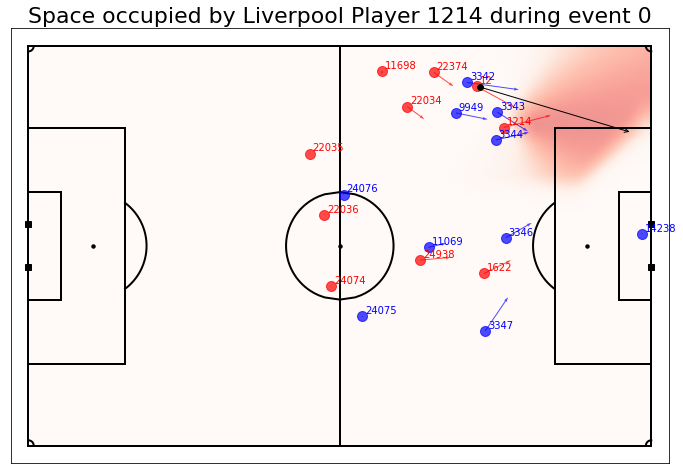

In [17]:
example_player_analysis_away.plot_pitch_control_difference(replace_function="presence")

In [24]:
# Finally, let's examine what would happen if we moved the player 10 meters towards the middle of the pitch
print(
    example_player_analysis_away.team_player_to_analyze
    + " Player "
    + str(example_player_analysis_away.player_to_analyze)
    + " would have occupied a difference of "
    + str(
        int(
            -1
            * example_player_analysis_away.calculate_space_created(
                replace_function="location", relative_x_change=-2, relative_y_change=-2
            )
        )
    )
    + " m^2 of space during event "
    + str(example_player_analysis_away.event_id)
    + " if they were 10 meters towards the center of the pitch"
)

Liverpool Player 1214 would have occupied a difference of -143 m^2 of space during event 0 if they were 10 meters towards the center of the pitch


Plotting new location


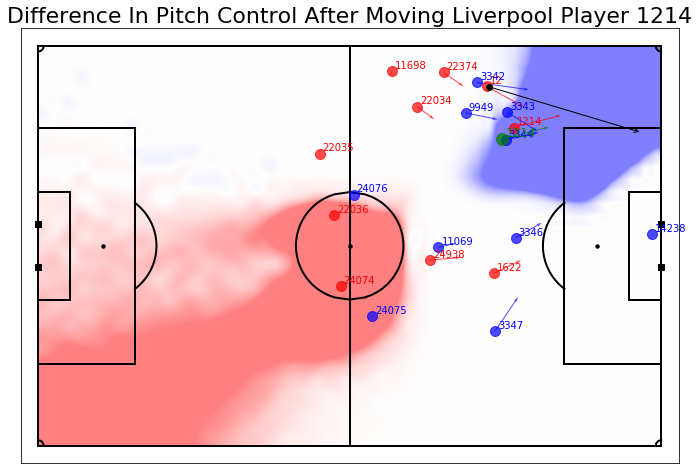

In [23]:
example_player_analysis_away.plot_pitch_control_difference(
    replace_function="location", relative_x_change=-2, relative_y_change=-2, team_colors=[k.split('_')[1] for k in df_dict.keys()][::-1]
)